<font size='5'>Loan Prediction</font>

In [44]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
from pyforest import *

In [45]:
#Read the CSV
df_train = pd.read_csv('train.csv');
df_train["train_test"] = 0
df_test = pd.read_csv('test.csv')
df_test["train_test"] = 1
df_compiled = pd.concat([df_train,df_test])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
df_compiled.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'train_test'],
      dtype='object')

In [47]:
df_compiled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  train_test         981 non-null    int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 115.0+ KB


In [48]:
df_compiled.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,train_test
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0


Loan ID is not useful <br>
Categorical features - Dependents, Gender, Married, Education, Self Employed, credit history, Property Area
Numerical features - Applicant Income, Coapplicant Income, Loan Amount, Loan term

It is a classifier type problem

<font size='5'>Cleaning Data

In [49]:
#Convert dependent to INT
df_compiled['Dependents'].value_counts()#remove null values in this column
df_compiled.dropna(subset=['Dependents'], inplace=True)

In [50]:
df_cat = df_compiled[['Dependents','Gender','Married','Education','Self_Employed','Credit_History','Property_Area']]
df_num = df_compiled[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64


<IPython.core.display.Javascript object>

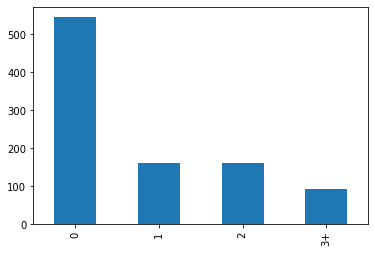

Male      756
Female    177
Name: Gender, dtype: int64


<IPython.core.display.Javascript object>

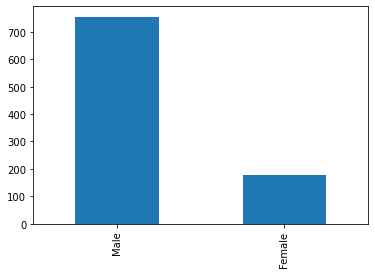

Yes    618
No     338
Name: Married, dtype: int64


<IPython.core.display.Javascript object>

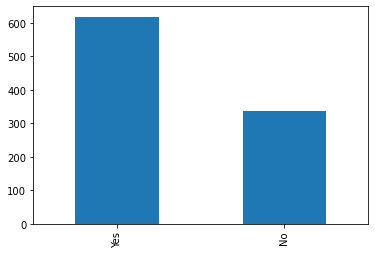

Graduate        743
Not Graduate    213
Name: Education, dtype: int64


<IPython.core.display.Javascript object>

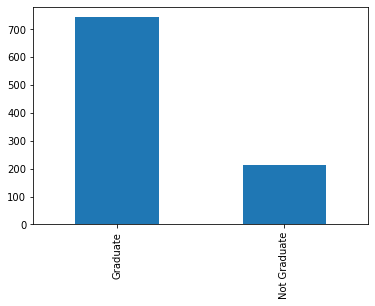

No     785
Yes    116
Name: Self_Employed, dtype: int64


<IPython.core.display.Javascript object>

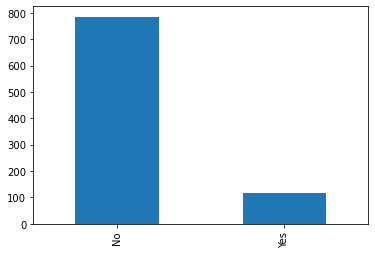

1.0    736
0.0    143
Name: Credit_History, dtype: int64


<IPython.core.display.Javascript object>

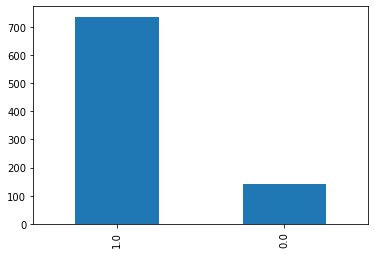

Semiurban    338
Urban        331
Rural        287
Name: Property_Area, dtype: int64


<IPython.core.display.Javascript object>

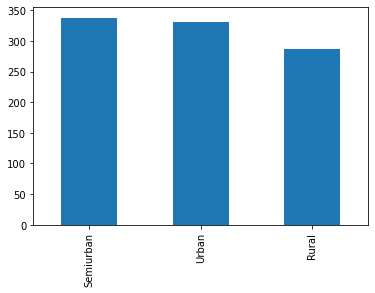

In [51]:
for i in df_cat.columns:
    print(df_compiled[i].value_counts())#drop null values in these columns
    df_compiled[i].value_counts().plot(kind = 'bar')
    plt.show()

In [52]:
#delete all rows with Nan in categorical variables
for i in df_cat.columns:
    df_compiled.dropna(subset=[i], inplace=True)

In [53]:
df_compiled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            809 non-null    object 
 1   Gender             809 non-null    object 
 2   Married            809 non-null    object 
 3   Dependents         809 non-null    object 
 4   Education          809 non-null    object 
 5   Self_Employed      809 non-null    object 
 6   ApplicantIncome    809 non-null    int64  
 7   CoapplicantIncome  809 non-null    float64
 8   LoanAmount         786 non-null    float64
 9   Loan_Amount_Term   792 non-null    float64
 10  Credit_History     809 non-null    float64
 11  Property_Area      809 non-null    object 
 12  Loan_Status        511 non-null    object 
 13  train_test         809 non-null    int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 94.8+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

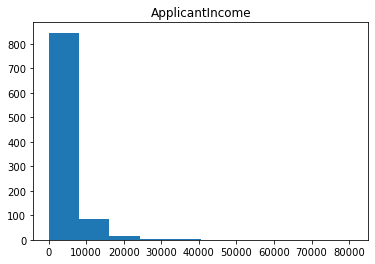

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

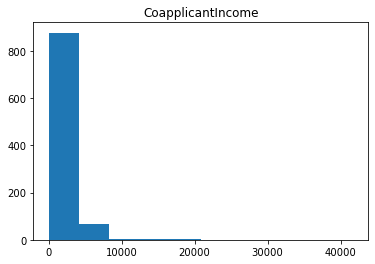

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

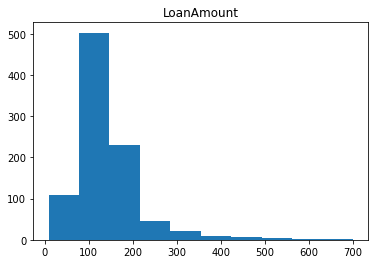

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

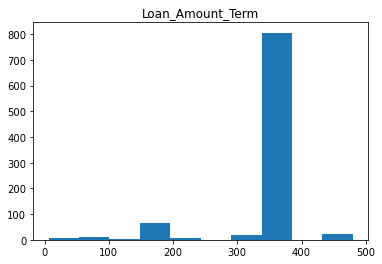

In [54]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [55]:
#loan amount and loan amount term are not normally distributed we should impute missing values with median

df_compiled['LoanAmount'] = df_compiled['LoanAmount'].fillna(df_compiled.LoanAmount.median())
df_compiled['Loan_Amount_Term'] = df_compiled['Loan_Amount_Term'].fillna(df_compiled.Loan_Amount_Term.median())

In [56]:
df_compiled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            809 non-null    object 
 1   Gender             809 non-null    object 
 2   Married            809 non-null    object 
 3   Dependents         809 non-null    object 
 4   Education          809 non-null    object 
 5   Self_Employed      809 non-null    object 
 6   ApplicantIncome    809 non-null    int64  
 7   CoapplicantIncome  809 non-null    float64
 8   LoanAmount         809 non-null    float64
 9   Loan_Amount_Term   809 non-null    float64
 10  Credit_History     809 non-null    float64
 11  Property_Area      809 non-null    object 
 12  Loan_Status        511 non-null    object 
 13  train_test         809 non-null    int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 94.8+ KB


In [57]:
#convert Credit history to str so that it can be treated as categorical variable
df_compiled['Credit_History'] = df_compiled.Credit_History.astype('str')
#create dummy variable from categoriacal variables
df_dummy = pd.get_dummies(df_compiled[['Gender', 'Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','train_test']])

<IPython.core.display.Javascript object>

In [58]:
df_dummy.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,train_test,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.5,360.0,0,0,1,1,0,1,...,0,1,0,1,0,0,1,0,0,1
1,4583,1508.0,128.0,360.0,0,0,1,0,1,0,...,0,1,0,1,0,0,1,1,0,0
2,3000,0.0,66.0,360.0,0,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,1
3,2583,2358.0,120.0,360.0,0,0,1,0,1,1,...,0,0,1,1,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,0,0,1,1,0,1,...,0,1,0,1,0,0,1,0,0,1


In [59]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_dummy[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = scale.fit_transform(df_dummy[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [67]:
X_train = df_dummy[df_dummy.train_test == 0].drop(['train_test'], axis = 1)
X_test = df_dummy[df_dummy.train_test == 1].drop(['train_test'], axis = 1)

y_train = df_compiled[df_compiled.train_test == 0].Loan_Status

In [68]:
y_train

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 511, dtype: object

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [69]:
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.82524272 0.76470588 0.7745098  0.8627451  0.78431373]
0.8023034456501048


In [70]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.82524272 0.7745098  0.76470588 0.8627451  0.80392157]
0.8062250142775558


In [71]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.80582524 0.74509804 0.7254902  0.71568627 0.75490196]
0.7494003426613365


In [72]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.78640777 0.68627451 0.75490196 0.79411765 0.76470588]
0.7572815533980581


In [73]:
rf = RandomForestClassifier(random_state= 1)
cv = cross_val_score(rf, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.80582524 0.75490196 0.7745098  0.7745098  0.78431373]
0.7788121073672187


In [74]:
svc = SVC(probability=True)
cv = cross_val_score(svc, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.83495146 0.76470588 0.75490196 0.85294118 0.79411765]
0.8003236245954692


In [75]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr), ('knn', knn), ('rf',rf),('gnb',gnb),('svc', svc)], voting = 'soft')

In [76]:
cv = cross_val_score(voting_clf, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.82524272 0.76470588 0.7745098  0.87254902 0.79411765]
0.8062250142775558


In [77]:
voting_clf.fit(X_train, y_train)
y_hat_base_vc = voting_clf.predict(X_test)
#X_test_scaled.info()
basic_submission = {'Loan_Status':y_hat_base_vc}
base_submission = pd.DataFrame(data = basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

<IPython.core.display.Javascript object>

In [78]:
df_ans = pd.read_csv('base_submission.csv')
df_ans['Loan_Status'].value_counts()

<IPython.core.display.Javascript object>

Y    248
N     50
Name: Loan_Status, dtype: int64